<a href="https://colab.research.google.com/github/Nitsh-kumar/ml_repo/blob/main/tensorflow_practice_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [28]:
# this will load the mnist data set into train and test data sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:

x_train.shape # this is user to know the size of the data set

(60000, 28, 28)

In [30]:
num_label = len(np.unique(y_train)) # this is used to fetch numer of unique label as they as 10 as of now
print("Number of labels", num_label)

Number of labels 10


In [31]:
unique , counts = np.unique(y_train , return_counts = True) #this code tell how the records are distributed with each digit
print("Train labels", dict(zip(unique , counts)))

Train labels {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [32]:
indices = np.random.randint(x_train.shape[0] , size = 10) # this is the random function to fetch random indices of the images from the
images = x_train[indices]                                 #train dataset
labels = y_train[indices]

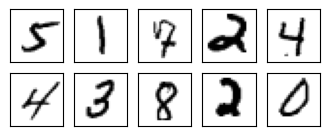

In [33]:
plt.figure(figsize = (4,4)) # this code will plot all the figures with a size of 4x4 inches (by default and it can be changed)
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i] , cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])

In [34]:
y_train = to_categorical(y_train)# this function is used to encode images into one hot encoded vector
y_test = to_categorical(y_test)# for train and test data set , for more info https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [35]:
image_size = x_train.shape[1]
input_shape = (image_size * image_size )

In [38]:
x_train[0].shape # as this is a 2 dimensional array so we need to perform dimensionality reduction
#for more info :- https://www.geeksforgeeks.org/dimensionality-reduction/

(28, 28)

In [39]:
x_train = np.reshape(x_train , (-1 , input_shape)) # here we converted (28, 28) array into (784,)
x_test = np.reshape(x_test , (-1 , input_shape))
x_train = x_train.astype('float32')/255# to get all values in binary , we divided each value by 255
x_test = x_test.astype('float32')/255# as each pixel value hold between 0-255

In [42]:
model = Sequential()
model.add(Dense(512 , activation = 'relu' , input_shape = (input_shape,)))
model.add(Dropout(0.2))
model.add(Dense(512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(num_label , activation = 'softmax'))

In [43]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(x_train , y_train , batch_size = 128 , epochs = 10 , validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 10s 22ms/step - loss: 0.2811 - accuracy: 0.9154 - val_loss: 0.1294 - val_accuracy: 0.9600
Epoch 2/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1104 - accuracy: 0.9657 - val_loss: 0.0938 - val_accuracy: 0.9700
Epoch 3/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0758 - accuracy: 0.9758 - val_loss: 0.0827 - val_accuracy: 0.9747
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0586 - accuracy: 0.9806 - val_loss: 0.0856 - val_accuracy: 0.9762
Epoch 5/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0457 - accuracy: 0.9854 - val_loss: 0.0793 - val_accuracy: 0.9763
Epoch 6/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0417 - accuracy: 0.9865 - val_loss: 0.0800 - val_accuracy: 0.9771
Epoch 7/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0335 - accuracy: 0.9886 - val_loss: 0.0883 - val_accuracy: 0.976

In [46]:
loss , accuracy = model.evaluate(x_test , y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0717 - accuracy: 0.9809


In [47]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [48]:
y_pred = np.argmax(y_pred , axis = 1)

In [49]:
y_pred[0]

7

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [51]:
y_test  = np.argmax(y_test , axis = 1)

In [54]:
matrix = confusion_matrix(y_test , y_pred)
matrix

array([[ 974,    0,    0,    0,    1,    0,    1,    0,    3,    1],
       [   0, 1123,    4,    0,    0,    0,    3,    0,    5,    0],
       [   3,    0, 1011,    0,    2,    0,    3,    5,    7,    1],
       [   1,    0,    6,  972,    0,   13,    0,    4,   11,    3],
       [   0,    0,    1,    0,  968,    0,    5,    2,    1,    5],
       [   2,    0,    0,    2,    1,  875,    2,    0,    8,    2],
       [   5,    2,    0,    1,    2,    2,  945,    0,    1,    0],
       [   1,    4,    7,    1,    1,    0,    0, 1003,    5,    6],
       [   0,    0,    1,    2,    0,    2,    0,    2,  965,    2],
       [   3,    3,    0,    2,   10,    5,    0,    5,    8,  973]])

In [57]:
print(accuracy_score(y_test , y_pred ))
print(precision_score(y_test , y_pred , average = 'weighted'))
print(recall_score(y_test , y_pred , average = 'weighted'))
print(f1_score(y_test , y_pred , average = 'weighted'))

0.9809
0.9810507139587966
0.9809
0.9809039422933321
